In [319]:
import numpy as np
from sklearn.datasets import make_regression
import matplotlib.pyplot as plt
import pandas as pd
%matplotlib inline

In [320]:
dataset=pd.read_csv("iris.csv")

In [321]:
dataset

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
...,...,...,...,...,...
145,6.7,3.0,5.2,2.3,Iris-virginica
146,6.3,2.5,5.0,1.9,Iris-virginica
147,6.5,3.0,5.2,2.0,Iris-virginica
148,6.2,3.4,5.4,2.3,Iris-virginica


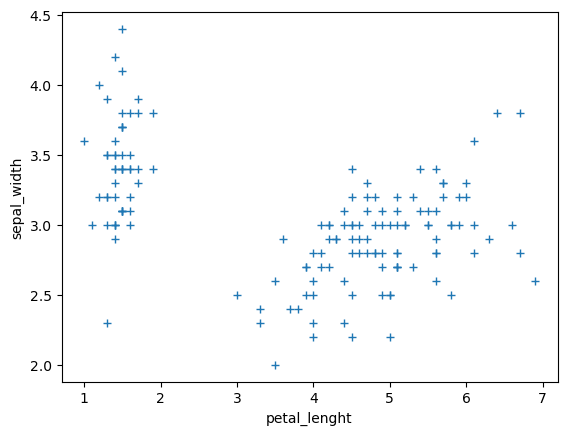

In [322]:
plt.plot(dataset["petal_length"],dataset["sepal_width"],'+')
plt.xlabel('petal_lenght')
plt.ylabel('sepal_width')
plt.show()

In [323]:
dataset=dataset[['petal_length','sepal_width']]
#print(df)
dataset.iloc[:,:] = (dataset - dataset.mean())/dataset.std()
dataset

C:\Users\lenovo\AppData\Local\Temp\ipykernel_23084\194147023.py:3: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataset.iloc[:,:] = (dataset - dataset.mean())/dataset.std()


,petal_length,sepal_width
0,-1.336794,1.028611
1,-1.336794,-0.124540
2,-1.393470,0.336720
3,-1.280118,0.106090
4,-1.336794,1.259242
...,...,...
145,0.816888,-0.124540
146,0.703536,-1.277692
147,0.816888,-0.124540
148,0.930239,0.797981


In [105]:
x=dataset.petal_length
y=dataset.sepal_width


In [106]:
x.shape

(150,)

In [110]:
x=dataset.petal_length.values.reshape(150,1)
y=dataset.sepal_width.values.reshape(150,1)

In [111]:
print(x.shape)
print(y.shape)

(150, 1)
(150, 1)


In [308]:
X = np.hstack((x, np.ones(x.shape)))
X = np.hstack((x**2, X))
X = np.hstack((x**3, X))
X = np.hstack((x**4, X))
X = np.hstack((x**5, X))


In [309]:
# Initialisation du vecteur theta aléatoire, avec 3 éléments (car X a trois colonnes)
np.random.seed(0) # pour produire toujours le meme vecteur theta aléatoire
theta = np.random.randn(6, 1)
theta

array([[ 1.76405235],
       [ 0.40015721],
       [ 0.97873798],
       [ 2.2408932 ],
       [ 1.86755799],
       [-0.97727788]])

In [310]:
def model(X, theta):
    return X.dot(theta)

In [311]:
def cost_function(X, y, theta):
    m = len(y)
    return 1/(2*m)*np.sum((model(X, theta) - y)**2)

In [312]:
cost_function(X, y, theta)

47.518282347834806

In [313]:
def grad(X, y, theta):
    m = len(y)
    return 1/m * X.T.dot(model(X, theta) - y)

In [314]:
def gradient_descent(X, y, theta, learning_rate, n_iterations):
    
    
    cost_history = np.zeros(n_iterations) # création d'un tableau de stockage pour enregistrer l'évolution du Cout du modele
    
    for i in range(0, n_iterations):
        theta = theta - learning_rate * grad(X, y, theta) # mise a jour du parametre theta (formule du gradient descent)
        cost_history[i] = cost_function(X, y, theta) # on enregistre la valeur du Cout au tour i dans cost_history[i]
        
    return theta, cost_history

In [315]:
n_iterations = 1000
learning_rate = 0.1

theta_final,cost_history = gradient_descent(X, y, theta, learning_rate, n_iterations)
print(cost_history)

[16.09984526  6.16272672  2.59589941  1.28167794  0.78852599  0.59680334
  0.51656012  0.47819822  0.45612767  0.44086572  0.42883536  0.41863368
  0.40966565  0.40164284  0.39439865  0.38781931  0.38181758  0.37632207
  0.37127249  0.36661719  0.36231161  0.35831714  0.3546003   0.35113197
  0.34788679  0.34484265  0.34198022  0.3392826   0.33673495  0.33432425
  0.33203901  0.32986911  0.32780556  0.32584042  0.32396659  0.32217775
  0.32046824  0.31883296  0.31726734  0.31576723  0.31432886  0.31294881
  0.31162396  0.31035143  0.30912859  0.30795301  0.30682245  0.3057348
  0.30468812  0.3036806   0.30271055  0.30177635  0.30087652  0.30000964
  0.29917436  0.29836944  0.29759366  0.29684588  0.29612504  0.29543008
  0.29476003  0.29411394  0.29349093  0.29289012  0.2923107   0.29175187
  0.29121289  0.29069302  0.29019157  0.28970788  0.28924129  0.28879119
  0.28835698  0.2879381   0.28753399  0.28714413  0.286768    0.28640512
  0.286055    0.2857172   0.28539128  0.28507682  0.

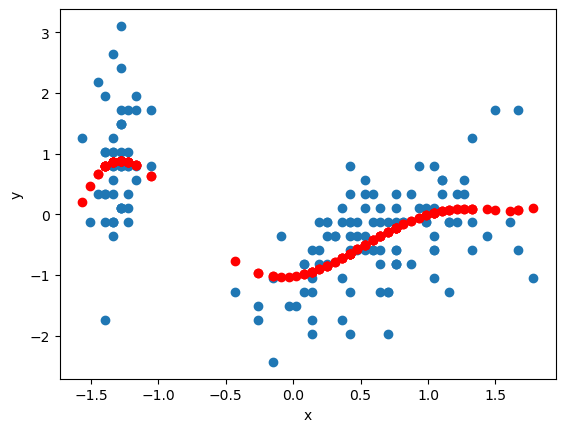

In [316]:
# création d'un vecteur prédictions qui contient les prédictions de notre modele final
predictions = model(X, theta_final)

# Affiche les résultats de prédictions (en rouge) par rapport a notre Dataset (en bleu)
plt.scatter(x, y)
plt.scatter(x, predictions, c='r')
plt.xlabel('x')
plt.ylabel('y')
plt.show()

In [317]:
def coef_determination(y, pred):
    u = ((y - pred)**2).sum()
    v = ((y - y.mean())**2).sum()
    return 1 - u/v

In [318]:
coef_determination(y, predictions)

0.44424954657884996